In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,filename,timestamp,year_sine,day_sine,moon_phase,basin,name,lat,lon,estimated_central_pressure,...,wv_x_4,wv_y_4,wv_x_5,wv_y_5,wv_x_6,wv_y_6,wv_x_7,wv_y_7,wv_x_8,wv_y_8
0,20070601180000,2007-06-01 18:00:00,0.516062,-1.000000e+00,-0.140464,ARB,GONU,15.0,68.0,1002.0,...,1.678896,6.404325,2.360240,5.985613,1.924336,-0.329804,2.562395,-7.041283,3.698475,-12.136565
1,20070601210000,2007-06-01 21:00:00,0.516062,-7.071068e-01,-0.165288,ARB,GONU,15.0,68.0,1002.0,...,0.139545,5.731421,1.036012,7.768498,2.398889,0.530154,4.692244,-6.084256,2.426826,-10.665859
2,20070602120000,2007-06-02 12:00:00,0.501242,-3.216245e-16,-0.288233,ARB,GONU,15.0,67.0,992.0,...,2.311171,8.654419,1.623776,2.095300,0.831110,3.022181,1.514332,2.436153,5.764182,-3.581330
3,20070602150000,2007-06-02 15:00:00,0.501242,-7.071068e-01,-0.312472,ARB,GONU,15.0,67.0,992.0,...,1.747917,9.337012,2.881186,4.514999,2.014203,5.649739,3.489846,3.126783,5.911513,-3.851261
4,20070602180000,2007-06-02 18:00:00,0.501242,-1.000000e+00,-0.336556,ARB,GONU,15.0,67.0,992.0,...,2.354354,7.858550,3.388550,5.808276,3.300183,3.498281,4.186034,-1.365116,6.852615,-4.007970


In [3]:
df.columns

Index(['filename', 'timestamp', 'year_sine', 'day_sine', 'moon_phase', 'basin',
       'name', 'lat', 'lon', 'estimated_central_pressure',
       'max_sustained_surface_wind', 'pressure_drop', 'grade', 'ir_x_1',
       'ir_y_1', 'ir_x_2', 'ir_y_2', 'ir_x_3', 'ir_y_3', 'ir_x_4', 'ir_y_4',
       'ir_x_5', 'ir_y_5', 'ir_x_6', 'ir_y_6', 'ir_x_7', 'ir_y_7', 'ir_x_8',
       'ir_y_8', 'wv_x_1', 'wv_y_1', 'wv_x_2', 'wv_y_2', 'wv_x_3', 'wv_y_3',
       'wv_x_4', 'wv_y_4', 'wv_x_5', 'wv_y_5', 'wv_x_6', 'wv_y_6', 'wv_x_7',
       'wv_y_7', 'wv_x_8', 'wv_y_8'],
      dtype='object')

# Category mapping

In [4]:
df.grade.unique()

array(['D', 'CS', 'SCS', 'VSCS', 'ESCS', 'SUCS', 'DD', 'Cs'], dtype=object)

In [5]:
category_mapping = {
    'D': 0,
    'DD': 1,
    'CS': 2,
    'Cs': 2,
    'SCS': 3,
    'VSCS': 4,
    'ESCS': 5,
    'SUCS': 6
}

df['grade'] = df['grade'].replace(category_mapping)

/tmp/ipykernel_14929/2236572978.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].replace(category_mapping)


In [7]:
df.grade.head()

0    0
1    0
2    2
3    2
4    2
Name: grade, dtype: int64

# Calculate dy and dx

In [8]:
df['dx'] = df.groupby('name')['lat'].diff()
df['dy'] = df.groupby('name')['lon'].diff()

df.head()

,filename,timestamp,year_sine,day_sine,moon_phase,basin,name,lat,lon,estimated_central_pressure,...,wv_x_5,wv_y_5,wv_x_6,wv_y_6,wv_x_7,wv_y_7,wv_x_8,wv_y_8,dx,dy
0,20070601180000,2007-06-01 18:00:00,0.516062,-1.000000e+00,-0.140464,ARB,GONU,15.0,68.0,1002.0,...,2.360240,5.985613,1.924336,-0.329804,2.562395,-7.041283,3.698475,-12.136565,NaN,NaN
1,20070601210000,2007-06-01 21:00:00,0.516062,-7.071068e-01,-0.165288,ARB,GONU,15.0,68.0,1002.0,...,1.036012,7.768498,2.398889,0.530154,4.692244,-6.084256,2.426826,-10.665859,0.0,0.0
2,20070602120000,2007-06-02 12:00:00,0.501242,-3.216245e-16,-0.288233,ARB,GONU,15.0,67.0,992.0,...,1.623776,2.095300,0.831110,3.022181,1.514332,2.436153,5.764182,-3.581330,0.0,-1.0
3,20070602150000,2007-06-02 15:00:00,0.501242,-7.071068e-01,-0.312472,ARB,GONU,15.0,67.0,992.0,...,2.881186,4.514999,2.014203,5.649739,3.489846,3.126783,5.911513,-3.851261,0.0,0.0
4,20070602180000,2007-06-02 18:00:00,0.501242,-1.000000e+00,-0.336556,ARB,GONU,15.0,67.0,992.0,...,3.388550,5.808276,3.300183,3.498281,4.186034,-1.365116,6.852615,-4.007970,0.0,0.0


# Calculate Correlationn

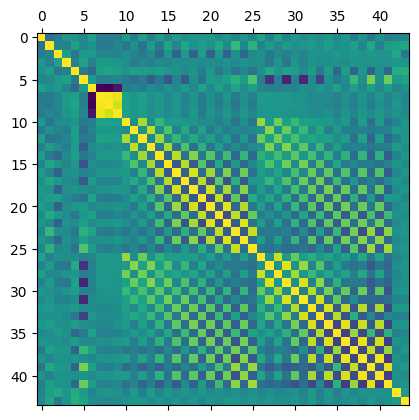

In [9]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.matshow(correlation_matrix)
plt.show()

In [10]:
correlation_with_latitude_change = correlation_matrix['dx']
print(correlation_with_latitude_change)

filename                     -0.065156
year_sine                     0.150174
day_sine                      0.200720
moon_phase                    0.073452
lat                           0.239771
lon                           0.085854
estimated_central_pressure   -0.084768
max_sustained_surface_wind    0.040460
pressure_drop                 0.058936
grade                         0.032033
ir_x_1                       -0.081540
ir_y_1                        0.100158
ir_x_2                       -0.108004
ir_y_2                        0.110808
ir_x_3                       -0.075170
ir_y_3                        0.069849
ir_x_4                       -0.025234
ir_y_4                        0.068008
ir_x_5                       -0.008399
ir_y_5                        0.057830
ir_x_6                       -0.042810
ir_y_6                        0.043616
ir_x_7                       -0.054212
ir_y_7                        0.026038
ir_x_8                       -0.027974
ir_y_8                   

In [11]:
correlation_with_longitude_change = correlation_matrix['dy']
print(correlation_with_longitude_change)

filename                     -0.061355
year_sine                     0.194544
day_sine                     -0.175445
moon_phase                    0.063649
lat                           0.268378
lon                           0.167461
estimated_central_pressure    0.009163
max_sustained_surface_wind   -0.048971
pressure_drop                -0.048686
grade                        -0.041614
ir_x_1                        0.049024
ir_y_1                        0.062401
ir_x_2                        0.070436
ir_y_2                       -0.014839
ir_x_3                        0.072865
ir_y_3                       -0.019645
ir_x_4                        0.055155
ir_y_4                       -0.039789
ir_x_5                        0.067228
ir_y_5                       -0.051297
ir_x_6                        0.074715
ir_y_6                       -0.009933
ir_x_7                        0.071716
ir_y_7                        0.064084
ir_x_8                        0.019841
ir_y_8                   

## Save Dataset

In [12]:
df.to_csv("final_dataset.csv", index=False)

# Models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

In [9]:
df.columns

Index(['filename', 'timestamp', 'year_sine', 'day_sine', 'moon_phase', 'basin',
       'name', 'lat', 'lon', 'estimated_central_pressure',
       'max_sustained_surface_wind', 'pressure_drop', 'grade', 'ir_x_1',
       'ir_y_1', 'ir_x_2', 'ir_y_2', 'ir_x_3', 'ir_y_3', 'ir_x_4', 'ir_y_4',
       'ir_x_5', 'ir_y_5', 'ir_x_6', 'ir_y_6', 'ir_x_7', 'ir_y_7', 'ir_x_8',
       'ir_y_8', 'wv_x_1', 'wv_y_1', 'wv_x_2', 'wv_y_2', 'wv_x_3', 'wv_y_3',
       'wv_x_4', 'wv_y_4', 'wv_x_5', 'wv_y_5', 'wv_x_6', 'wv_y_6', 'wv_x_7',
       'wv_y_7', 'wv_x_8', 'wv_y_8', 'dx', 'dy'],
      dtype='object')

In [11]:
dropping = ['filename', 'timestamp', 'basin', 'name', 'grade', 'lat', 'lon']
foo = df.drop(dropping, axis=1)
foo = foo.dropna()
foo.to_csv("final_dataset.csv", index=False)
foo.columns

Index(['year_sine', 'day_sine', 'moon_phase', 'estimated_central_pressure',
       'max_sustained_surface_wind', 'pressure_drop', 'ir_x_1', 'ir_y_1',
       'ir_x_2', 'ir_y_2', 'ir_x_3', 'ir_y_3', 'ir_x_4', 'ir_y_4', 'ir_x_5',
       'ir_y_5', 'ir_x_6', 'ir_y_6', 'ir_x_7', 'ir_y_7', 'ir_x_8', 'ir_y_8',
       'wv_x_1', 'wv_y_1', 'wv_x_2', 'wv_y_2', 'wv_x_3', 'wv_y_3', 'wv_x_4',
       'wv_y_4', 'wv_x_5', 'wv_y_5', 'wv_x_6', 'wv_y_6', 'wv_x_7', 'wv_y_7',
       'wv_x_8', 'wv_y_8', 'dx', 'dy'],
      dtype='object')

In [11]:
X = foo.drop(columns=['dx', 'dy'])
y = foo[['dx', 'dy']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

In [14]:
print(f"Mean Absolute Error (Latitude, Longitude): {mae}")
print(f"Overall R² Score: {r2}")

Mean Absolute Error (Latitude, Longitude): [0.29065476 0.41127381]
Overall R² Score: 0.2859186491596777
